# Stock Price Prediction

### Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

Symbols of all 50 companies in NSE

In [2]:
symbols = ["RELIANCE.NS", "HDFCBANK.NS","ICICIBANK.NS","INFY.NS","HDFC.NS","TCS.NS","ITC.NS","LT.NS","KOTAKBANK.NS"
          ,"AXISBANK.NS","HINDUNILVR.NS","SBIN.NS","BHARTIARTL.NS","BAJFINANCE.NS","M&M.NS","ASIANPAINT.NS",
           "HCLTECH.NS","MARUTI.NS","SUNPHARMA.NS","TITAN.NS","TATASTEEL.NS","NTPC.NS","ULTRACEMCO.NS",
           "ADANIENT.NS","TATAMOTORS.NS","POWERGRID.NS","BAJAJFINSV.NS","INDUSINDBK.NS","HINDALCO.NS",
           "JSWSTEEL.NS","NESTLEIND.NS","TECHM.NS","GRASIM.NS","WIPRO.NS","HDFCLIFE.NS","ONGC.NS","CIPLA.NS",
           "SBILIFE.NS","DRREDDY.NS","BRITANNIA.NS","COALINDIA.NS","ADANIPORTS.NS","EICHERMOT.NS","APOLLOHOSP.NS",
           "TATACONSUM.NS","BAJAJ-AUTO.NS","DIVISLAB.NS","UPL.NS","HEROMOTOCO.NS","BPCL.NS"
          ]

Downloading the dataset from yahoo finance

In [3]:
# price_data = [yf.Ticker(symbol).history(period="7y") for symbol in symbols]

In [4]:
# companyPrice = {a:b for a,b in zip(symbols,price_data)}
# companyPrice

Save the companyPrice dictionary which contains the dataset as a pickle file

In [5]:
# datadict = open('datasetDict.pkl', 'ab')
# pickle.dump(companyPrice, datadict)
# datadict.close()

Loading the pickle file incase dataset was already downloaded

In [6]:
fl = open('datasetDict.pkl', 'rb')
companyPrice = pickle.load(fl)

In [7]:
c,rel = 'Close','SBIN.NS' # we will be using closing price for prediction

In [8]:
companyPrice[rel].shape

(1732, 7)

In [9]:
companyPrice[rel]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-04-27 00:00:00+05:30,191.728355,191.728355,186.574886,187.195206,22801603,0.0,0.0
2016-04-28 00:00:00+05:30,187.767824,189.151624,182.471193,183.282394,24555479,0.0,0.0
2016-04-29 00:00:00+05:30,183.139213,185.143348,177.938024,180.371613,21021661,0.0,0.0
2016-05-02 00:00:00+05:30,179.035537,179.846723,177.031402,177.508575,14469844,0.0,0.0
2016-05-03 00:00:00+05:30,178.462919,180.705641,175.265851,175.647598,16247931,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-21 00:00:00+05:30,545.000000,546.400024,539.700012,543.150024,22599418,0.0,0.0
2023-04-24 00:00:00+05:30,543.799988,555.549988,543.500000,554.599976,23335611,0.0,0.0
2023-04-25 00:00:00+05:30,555.000000,567.900024,555.000000,561.799988,38142390,0.0,0.0


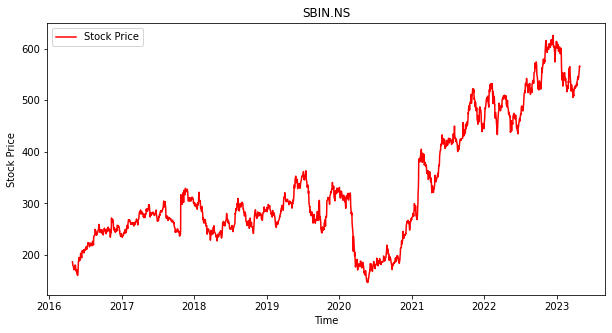

In [10]:
fig = plt.figure(figsize = (10,5))
plt.plot(companyPrice[rel][c], color = 'red', label ='Stock Price')
plt.title(rel)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

### Utilities

Train-test split

In [11]:
testing_ratio,training_ratio=0.2,0.8

In [12]:
training_size,testing_size = int(training_ratio*len(companyPrice[rel])),int(testing_ratio*len(companyPrice[rel]))

In [13]:
print(f'Training and testing size for Reliance, {training_size=}, {testing_size=}')

Training and testing size for Reliance, training_size=1385, testing_size=346


Root mean square error

In [14]:
def rmse(actual, predicted):
    rmse = np.sqrt(np.mean((actual-predicted)**2))
    return rmse

In [15]:
def calculate_rmse(actual_prices:pd.DataFrame, predicted_prices:np.array):
    tr_size = int(training_ratio*len(actual_prices))
    error = rmse(np.array(actual_prices[tr_size:]['Close']), np.array(predicted_prices[tr_size:]))
    return error

Plotting

In [16]:
def plot_overlapping_graph(actual_price,predicted_price,k,predicted_label) :
    fig = plt.figure(figsize = (20,10))
    plt.plot(actual_price, color = 'red', label ='Actual Stock Price')
    plt.plot(predicted_price, color = 'blue', label = '50 Day '+ predicted_label)
    t = f'{k}'
    plt.title(t)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()

### Simple Moving Average

In [17]:
days = 50

In [18]:
sma = dict()

In [19]:
for k in companyPrice :
    sma[k] = companyPrice[k][c].rolling(days).mean()

In [20]:
sma[rel]

Date
2016-04-27 00:00:00+05:30           NaN
2016-04-28 00:00:00+05:30           NaN
2016-04-29 00:00:00+05:30           NaN
2016-05-02 00:00:00+05:30           NaN
2016-05-03 00:00:00+05:30           NaN
                                ...    
2023-04-21 00:00:00+05:30    532.823998
2023-04-24 00:00:00+05:30    533.007997
2023-04-25 00:00:00+05:30    533.301998
2023-04-26 00:00:00+05:30    533.633997
2023-04-27 00:00:00+05:30    533.917997
Name: Close, Length: 1732, dtype: float64

In [21]:
sma_error = {k:calculate_rmse(companyPrice[k],sma[k]) for k in symbols}

In [22]:
sma_error

{'RELIANCE.NS': 118.16229670317682,
 'HDFCBANK.NS': 65.11055577968027,
 'ICICIBANK.NS': 44.40945052744141,
 'INFY.NS': 103.06241157185887,
 'HDFC.NS': 131.3403791691605,
 'TCS.NS': 148.02292882633878,
 'ITC.NS': 18.45023263902946,
 'LT.NS': 104.6056526745271,
 'KOTAKBANK.NS': 83.07743250102315,
 'AXISBANK.NS': 52.92398097259154,
 'HINDUNILVR.NS': 119.15073128017984,
 'SBIN.NS': 30.314683958343256,
 'BHARTIARTL.NS': 33.134129331981406,
 'BAJFINANCE.NS': 525.8211316065857,
 'M&M.NS': 78.99331296652566,
 'ASIANPAINT.NS': 197.85674498204278,
 'HCLTECH.NS': 58.95135900138145,
 'MARUTI.NS': 420.1631860575684,
 'SUNPHARMA.NS': 41.860434108117566,
 'TITAN.NS': 154.62916396118192,
 'TATASTEEL.NS': 11.295685220682339,
 'NTPC.NS': 8.249255877891096,
 'ULTRACEMCO.NS': 424.51224392765056,
 'ADANIENT.NS': 523.3045034669085,
 'TATAMOTORS.NS': 27.0489190692291,
 'POWERGRID.NS': 9.565844581273694,
 'BAJAJFINSV.NS': 150.8010515753592,
 'INDUSINDBK.NS': 84.16215700400477,
 'HINDALCO.NS': 51.8663002954317

Average root mean square error

In [23]:
avg_sma,median_sma = np.mean(np.array(list(sma_error.values()))),np.median(np.array(list(sma_error.values())))

In [24]:
print(f'mean = {avg_sma}, median = {median_sma}')

mean = 135.15427341190932, median = 81.03537273377441


Plotting SMA for Reliance

RMSE for Reliance=30.314683958343256


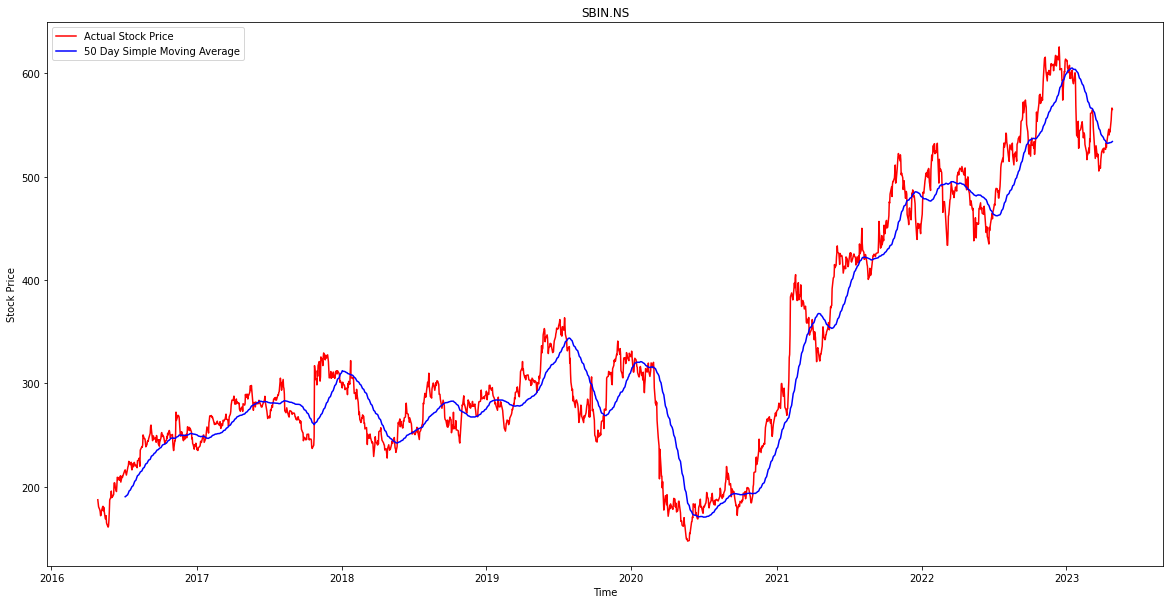

In [25]:
plot_overlapping_graph(companyPrice[rel][c],sma[rel],rel,'Simple Moving Average')
print(f'RMSE for Reliance={sma_error[rel]}')

### Exponential Moving Average

In [26]:
days = 50

In [27]:
ema = dict()

In [28]:
for k in companyPrice :
    ema[k] = companyPrice[k][c].ewm(span=days, adjust=False).mean()

In [29]:
ema[rel]

Date
2016-04-27 00:00:00+05:30    187.195206
2016-04-28 00:00:00+05:30    187.041762
2016-04-29 00:00:00+05:30    186.780188
2016-05-02 00:00:00+05:30    186.416595
2016-05-03 00:00:00+05:30    185.994281
                                ...    
2023-04-21 00:00:00+05:30    538.525732
2023-04-24 00:00:00+05:30    539.156095
2023-04-25 00:00:00+05:30    540.044090
2023-04-26 00:00:00+05:30    541.075694
2023-04-27 00:00:00+05:30    542.013902
Name: Close, Length: 1732, dtype: float64

In [30]:
ema_error = {k:calculate_rmse(companyPrice[k],ema[k]) for k in symbols}

In [31]:
ema_error

{'RELIANCE.NS': 98.37102734191159,
 'HDFCBANK.NS': 57.436145772846906,
 'ICICIBANK.NS': 37.71143163832626,
 'INFY.NS': 86.35790585961979,
 'HDFC.NS': 116.32416035807002,
 'TCS.NS': 124.85388630034754,
 'ITC.NS': 16.749477870763826,
 'LT.NS': 91.80076144282354,
 'KOTAKBANK.NS': 68.2638294230806,
 'AXISBANK.NS': 44.79831856004124,
 'HINDUNILVR.NS': 103.7960114875418,
 'SBIN.NS': 25.902865520263468,
 'BHARTIARTL.NS': 28.054915461748884,
 'BAJFINANCE.NS': 437.2556798475841,
 'M&M.NS': 69.81537730051411,
 'ASIANPAINT.NS': 157.4826355448642,
 'HCLTECH.NS': 51.09293898457875,
 'MARUTI.NS': 358.2641357603111,
 'SUNPHARMA.NS': 35.76704261221874,
 'TITAN.NS': 129.69036298732922,
 'TATASTEEL.NS': 9.5889308227981,
 'NTPC.NS': 6.827357463904541,
 'ULTRACEMCO.NS': 355.7123255638123,
 'ADANIENT.NS': 442.07676109073236,
 'TATAMOTORS.NS': 23.678607034277704,
 'POWERGRID.NS': 8.240520340636209,
 'BAJAJFINSV.NS': 124.0619778790735,
 'INDUSINDBK.NS': 68.78202859617029,
 'HINDALCO.NS': 41.21995239383585,
 

Average and median root mean square error

In [32]:
avg_ema,median_ema = np.mean(np.array(list(ema_error.values()))), np.median(np.array(list(ema_error.values())))

In [33]:
print(f'mean = {avg_ema}, median = {median_ema}')

mean = 113.76213573979877, median = 68.52292900962544


Plotting ema for Reliance

RMSE for Reliance=25.902865520263468


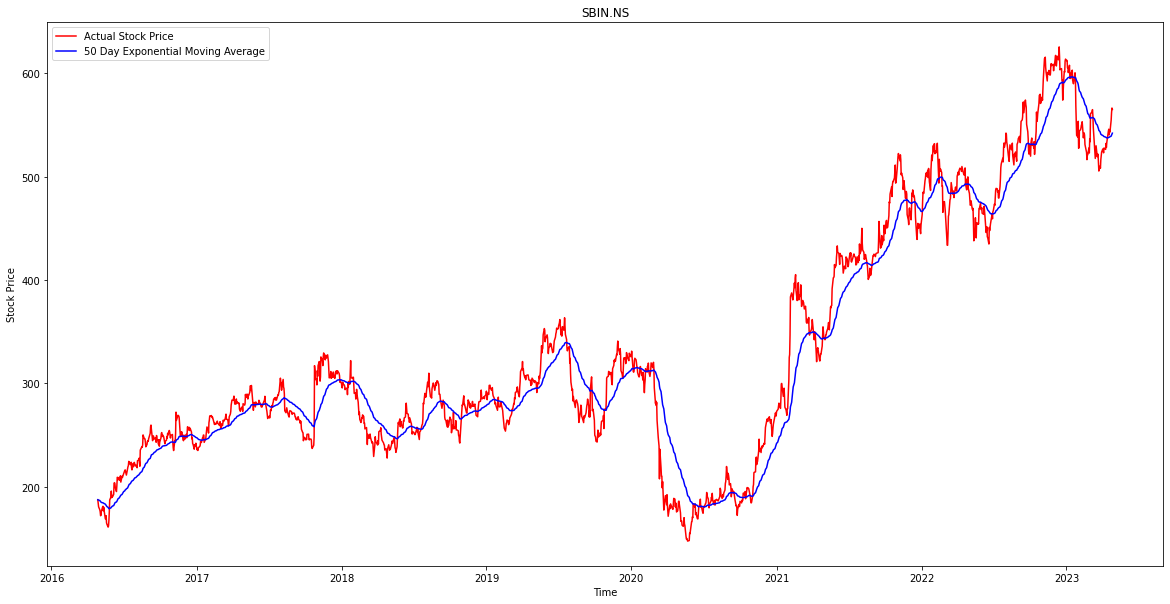

In [34]:
plot_overlapping_graph(companyPrice[rel][c],ema[rel],rel,'Exponential Moving Average')
print(f'RMSE for Reliance={ema_error[rel]}')

#### Comparison between SMA and EMA

In [35]:
print(f'Average RMSE for SMA is {avg_sma} and for EMA is {avg_ema}')

Average RMSE for SMA is 135.15427341190932 and for EMA is 113.76213573979877


In [36]:
print(f'Median RMSE for SMA is {median_sma} and for EMA is {median_ema}')

Median RMSE for SMA is 81.03537273377441 and for EMA is 68.52292900962544


### LSTM

In [37]:
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

2023-05-04 19:16:32.624989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 19:16:33.099657: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 19:16:33.156803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-04 19:16:33.156842: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [38]:
nifty_close_values = {k:companyPrice[k][c].values for k in companyPrice}
nifty_close_values[rel]

array([187.19520569, 183.28239441, 180.37161255, ..., 561.79998779,
       566.34997559, 565.        ])

Length of training data of all companines

In [39]:
training_data_len = {k:math.ceil(len(nifty_close_values[k])*0.8) for k in companyPrice}
training_data_len

{'RELIANCE.NS': 1386,
 'HDFCBANK.NS': 1386,
 'ICICIBANK.NS': 1386,
 'INFY.NS': 1386,
 'HDFC.NS': 1386,
 'TCS.NS': 1386,
 'ITC.NS': 1386,
 'LT.NS': 1386,
 'KOTAKBANK.NS': 1386,
 'AXISBANK.NS': 1386,
 'HINDUNILVR.NS': 1386,
 'SBIN.NS': 1386,
 'BHARTIARTL.NS': 1386,
 'BAJFINANCE.NS': 1386,
 'M&M.NS': 1386,
 'ASIANPAINT.NS': 1386,
 'HCLTECH.NS': 1386,
 'MARUTI.NS': 1386,
 'SUNPHARMA.NS': 1386,
 'TITAN.NS': 1386,
 'TATASTEEL.NS': 1386,
 'NTPC.NS': 1386,
 'ULTRACEMCO.NS': 1386,
 'ADANIENT.NS': 1386,
 'TATAMOTORS.NS': 1386,
 'POWERGRID.NS': 1386,
 'BAJAJFINSV.NS': 1386,
 'INDUSINDBK.NS': 1386,
 'HINDALCO.NS': 1386,
 'JSWSTEEL.NS': 1386,
 'NESTLEIND.NS': 1386,
 'TECHM.NS': 1386,
 'GRASIM.NS': 1386,
 'WIPRO.NS': 1386,
 'HDFCLIFE.NS': 1076,
 'ONGC.NS': 1386,
 'CIPLA.NS': 1386,
 'SBILIFE.NS': 1101,
 'DRREDDY.NS': 1386,
 'BRITANNIA.NS': 1386,
 'COALINDIA.NS': 1386,
 'ADANIPORTS.NS': 1386,
 'EICHERMOT.NS': 1386,
 'APOLLOHOSP.NS': 1386,
 'TATACONSUM.NS': 1386,
 'BAJAJ-AUTO.NS': 1386,
 'DIVISLAB.NS':

In [40]:
scaler = {}
for k in symbols :
    scaler[k] = MinMaxScaler(feature_range=(0,1))

In [41]:
scaled_values = {}
for k in nifty_close_values :
    nifty_close_values[k] = nifty_close_values[k].reshape((-1,1))
    scaled_values[k] = scaler[k].fit_transform(nifty_close_values[k])
print(f"Scaled values for {rel}")
print(scaled_values[rel])
print(scaler[rel].inverse_transform(scaled_values[rel]))

Scaled values for SBIN.NS
[[0.08367081]
 [0.0754906 ]
 [0.06940526]
 ...
 [0.86682742]
 [0.87633972]
 [0.87351743]]
[[187.19520569]
 [183.28239441]
 [180.37161255]
 ...
 [561.79998779]
 [566.34997559]
 [565.        ]]


Creating scaled training data

In [42]:
trainData= {}
for k in symbols:
    trainData[k] = scaled_values[k][:training_data_len[k],:]

In [43]:
len(trainData[rel]) #len of Reliance's training data

1386

In [44]:
x_train,y_train=defaultdict(list),defaultdict(list) #x_train is the independent feature and y_train is the dependent

In [45]:
days = 50
for k in companyPrice :
    for i in range(days,len(trainData[k])) :
        x_train[k].append(trainData[k][i-days:i,0])
        y_train[k].append(trainData[k][i,0])

In [46]:
for k in symbols :
    x_train[k],y_train[k]=np.array(x_train[k]),np.array(y_train[k])

Reshape train dataset because lstm model expects 3D data

In [47]:
for k in symbols :
    x_train[k] = np.reshape(x_train[k],(x_train[k].shape[0],x_train[k].shape[1],1))

In [48]:
x_train[rel].shape

(1336, 50, 1)

In [49]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(days,1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2023-05-04 19:16:37.168450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-04 19:16:37.168809: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-04 19:16:37.168878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shashank-IdeaPad): /proc/driver/nvidia/version does not exist
2023-05-04 19:16:37.169817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


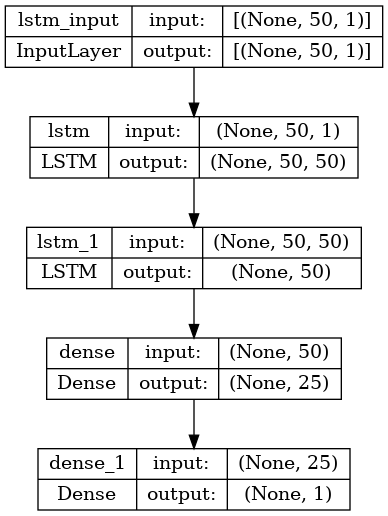

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
plot_model(model, show_shapes=True, show_layer_names=True)

In [51]:
model.fit(x_train[rel],y_train[rel],batch_size=1,epochs=10, verbose=1)

Epoch 1/10
1336/1336 [==============================] - 27s 18ms/step - loss: 0.0017
Epoch 2/10
1336/1336 [==============================] - 26s 20ms/step - loss: 6.4619e-04
Epoch 3/10
1336/1336 [==============================] - 24s 18ms/step - loss: 5.1008e-04
Epoch 4/10
1336/1336 [==============================] - 22s 16ms/step - loss: 4.2439e-04
Epoch 5/10
1336/1336 [==============================] - 22s 17ms/step - loss: 4.2085e-04
Epoch 6/10
1336/1336 [==============================] - 21s 15ms/step - loss: 3.5993e-04
Epoch 7/10
1336/1336 [==============================] - 22s 16ms/step - loss: 3.6359e-04
Epoch 8/10
1336/1336 [==============================] - 22s 16ms/step - loss: 3.4569e-04
Epoch 9/10
1336/1336 [==============================] - 21s 16ms/step - loss: 3.3866e-04
Epoch 10/10
1336/1336 [==============================] - 21s 16ms/step - loss: 3.4129e-04


### Testing dataset

In [52]:
testData = {}
x_test,y_test = {},{}
for k in symbols :
    testData[k] = scaled_values[k][training_data_len[k]-days:,:]
    y_test[k] = nifty_close_values[k][training_data_len[k]:,:]
    x_test[k] = []
    for i in range(days,len(testData[k])) :
        x_test[k].append(testData[k][i-days:i,0])
    x_test[k] = np.array(x_test[k])

In [53]:
#reshaping test data
for k in symbols :
    x_test[k] = np.reshape(x_test[k],(x_test[k].shape[0],x_test[k].shape[1],1))

In [54]:
prediction = model.predict(x_test[rel])
prediction = scaler[rel].inverse_transform(prediction)

11/11 [==============================] - 1s 12ms/step


In [55]:
y_test[rel]

array([[458.15005493],
       [469.37487793],
       [483.99667358],
       [481.14123535],
       [487.09829712],
       [480.30429077],
       [481.04278564],
       [477.35040283],
       [473.75650024],
       [460.6116333 ],
       [442.29745483],
       [439.14663696],
       [448.84527588],
       [454.7038269 ],
       [449.92837524],
       [451.01144409],
       [454.11306763],
       [447.4175415 ],
       [444.7590332 ],
       [453.37460327],
       [463.56552124],
       [476.07037354],
       [484.83361816],
       [484.14440918],
       [483.70129395],
       [495.91073608],
       [498.17541504],
       [502.40933228],
       [503.49243164],
       [500.5385437 ],
       [506.10171509],
       [499.0123291 ],
       [507.87405396],
       [503.54165649],
       [494.97537231],
       [486.55673218],
       [506.74176025],
       [520.82202148],
       [515.40649414],
       [530.02832031],
       [524.1204834 ],
       [531.50524902],
       [531.80065918],
       [522

In [56]:
prediction

array([[459.80194],
       [451.99298],
       [467.24023],
       [479.86288],
       [474.80286],
       [485.04865],
       [474.26486],
       [478.52783],
       [472.11798],
       [469.15387],
       [453.50534],
       [435.17456],
       [434.20724],
       [443.80496],
       [447.95627],
       [442.46994],
       [446.2129 ],
       [449.06015],
       [440.74863],
       [440.00723],
       [449.8206 ],
       [459.1533 ],
       [472.37875],
       [481.05734],
       [479.92548],
       [480.83392],
       [495.12643],
       [493.85992],
       [500.34995],
       [500.12585],
       [496.7753 ],
       [504.3844 ],
       [492.8597 ],
       [507.2646 ],
       [496.94122],
       [490.0263 ],
       [481.1635 ],
       [506.79736],
       [515.1819 ],
       [509.28012],
       [530.7114 ],
       [517.4302 ],
       [532.1449 ],
       [527.4121 ],
       [517.3751 ],
       [523.9645 ],
       [517.99817],
       [524.5188 ],
       [528.60364],
       [514.3343 ],


### Accuracy

In [57]:
# finding accuracy of the model
acc = 0
for i in range(len(prediction)) :
    acc+=(abs(y_test[rel][i]-prediction[i])/y_test[rel][i])*100

In [58]:
accp = 100-acc/len(prediction)
accp

array([98.50782684])

### Visualising Predicted Data

In [59]:
prediction = prediction.reshape((-1))
prediction

array([459.80194, 451.99298, 467.24023, 479.86288, 474.80286, 485.04865,
       474.26486, 478.52783, 472.11798, 469.15387, 453.50534, 435.17456,
       434.20724, 443.80496, 447.95627, 442.46994, 446.2129 , 449.06015,
       440.74863, 440.00723, 449.8206 , 459.1533 , 472.37875, 481.05734,
       479.92548, 480.83392, 495.12643, 493.85992, 500.34995, 500.12585,
       496.7753 , 504.3844 , 492.8597 , 507.2646 , 496.94122, 490.0263 ,
       481.1635 , 506.79736, 515.1819 , 509.28012, 530.7114 , 517.4302 ,
       532.1449 , 527.4121 , 517.3751 , 523.9645 , 517.99817, 524.5188 ,
       528.60364, 514.3343 , 484.87762, 520.6453 , 496.86   , 501.53928,
       502.67822, 497.7811 , 483.28903, 487.59207, 453.80392, 474.94888,
       467.1262 , 459.29776, 453.8301 , 448.23856, 424.02493, 429.05212,
       439.2829 , 455.86963, 456.03723, 474.90298, 472.77142, 483.13046,
       491.74097, 476.81863, 485.3594 , 478.00204, 475.46194, 479.84183,
       486.05096, 481.6592 , 482.74655, 481.39975, 

In [60]:
dates = companyPrice[rel].index.to_list()
dates = dates[-len(prediction):]

In [61]:
prediction_df = pd.DataFrame({'Date':dates,'Close':prediction})

In [62]:
prediction_df.set_index('Date',inplace=True)

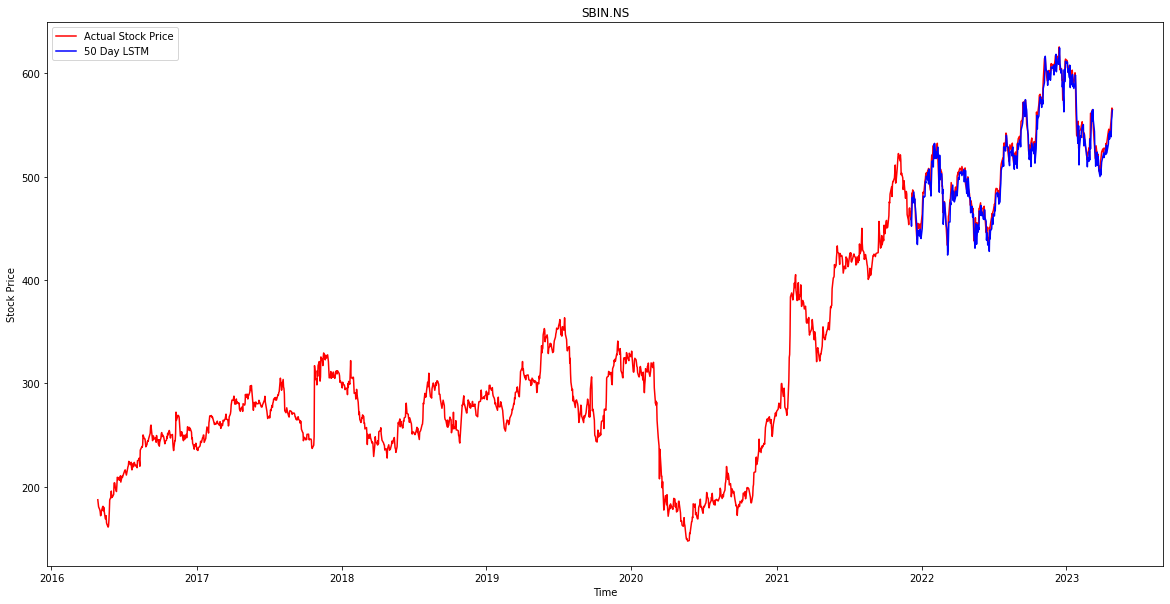

In [63]:
plot_overlapping_graph(companyPrice[rel][c],prediction_df,rel,'LSTM')

Visualising only the predicted part

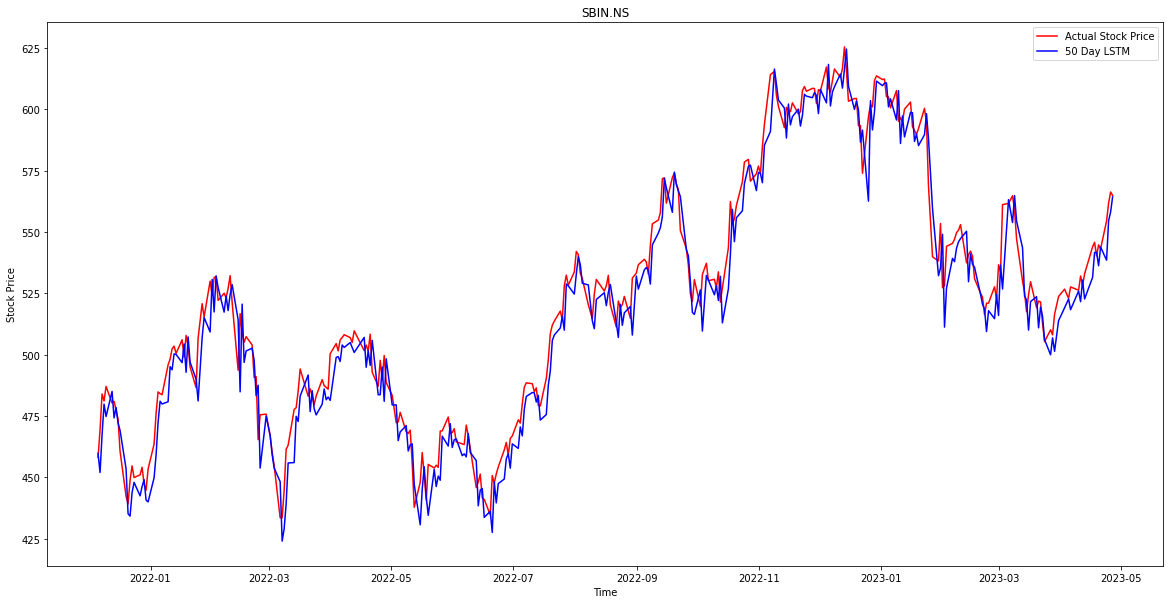

In [64]:
plot_overlapping_graph(companyPrice[rel][c][-len(prediction)::],prediction_df,rel,'LSTM')

In [ ]:
[]